<font color = green >

## Home Task 1: Implement K-means algorithm

</font>

<font color = green >

###  Steps of implementatiion

</font>

1) Initialize $K$ centroids 

2) Assign every point to closest centroid 

3) Compute new centroids as means of samples assigned to corresponding centroid

4) Implement cost $J = \frac{1}{m}\underset{i}{\sum}(d^{(i)})^{2}$ where $d^{(i)}$ is distance from sample $x^{(i)}$ to assigned centroid $c^{(i)}$

5) Iterate setps 2,3 till cost is stabile 

6) Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

7) Visualize results (clusters, centroids) for $K=4$

Note: 
* You may  need develop couple of additional/intermediate functions
* You may track cost changes to make sure the algorithm is working properly 

In [39]:
from sklearn.datasets import make_classification
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
%matplotlib inline

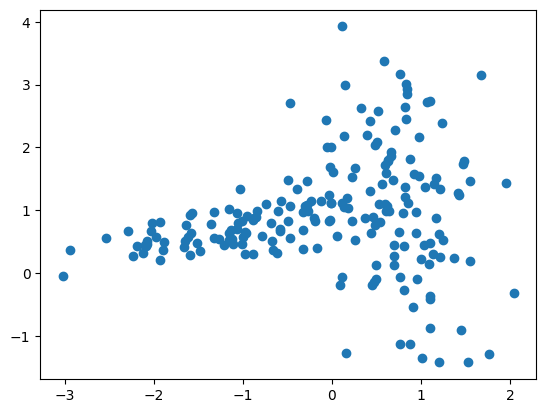

In [40]:
Xc_2,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)
plt.figure()
plt.scatter  (Xc_2[:,0], Xc_2[:,1])

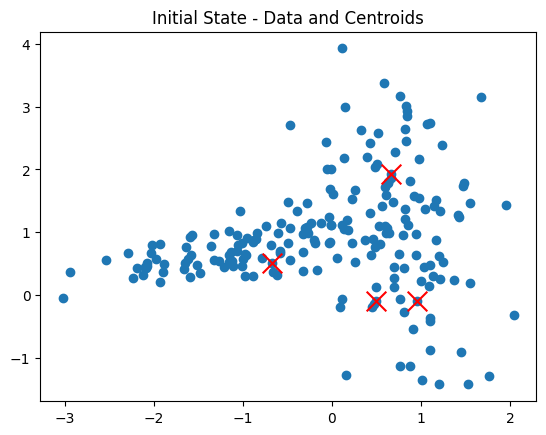

In [41]:
Xc_2, _ = make_classification(n_samples=200, 
                              n_features=2,
                              n_informative=2, 
                              n_redundant=0, 
                              random_state=0, 
                              n_clusters_per_class=1, 
                              class_sep=0.8)

K = 4

centroids = Xc_2[np.random.choice(Xc_2.shape[0], K, replace=False)]

plt.scatter(Xc_2[:, 0], Xc_2[:, 1], label='Data')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, label='Initial Centroids')
plt.title('Initial State - Data and Centroids')
plt.show()

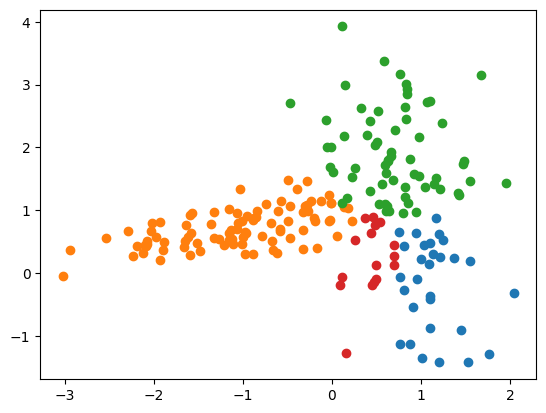

In [42]:
labels = np.argmin(np.linalg.norm(Xc_2[:, np.newaxis, :] - centroids, axis=2), axis=1)

for k in range(K):
    plt.scatter(Xc_2[labels == k, 0], Xc_2[labels == k, 1], label=f'Cluster {k + 1}')
    
plt.show()

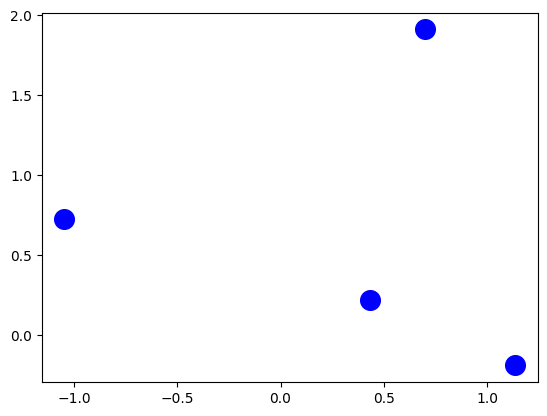

In [43]:
new_centroids = np.array([Xc_2[labels == k].mean(axis=0) for k in range(K)])

plt.scatter(new_centroids[:, 0], new_centroids[:, 1], marker='o', color='blue', s=200, label='New Centroids')
plt.show()

Implement cost $J = \frac{1}{m}\underset{i}{\sum}(d^{(i)})^{2}$ where $d^{(i)}$ is distance from sample $x^{(i)}$ to assigned centroid $c^{(i)}$


In [44]:
cost = np.sum(np.linalg.norm(Xc_2 - centroids[labels], axis=1)**2) / Xc_2.shape[0]

print(f'Initial Cost: {cost}')

Initial Cost: 0.7277790115564394


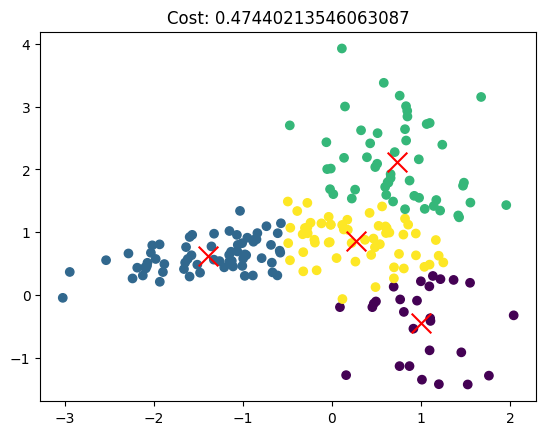

In [45]:
is_stable = False
while not is_stable:
    labels = np.argmin(np.linalg.norm(Xc_2[:, np.newaxis, :] - centroids, axis=2), axis=1)

    cost = np.sum(np.linalg.norm(Xc_2 - centroids[labels], axis=1)**2) / Xc_2.shape[0]

    new_centroids = np.array([Xc_2[labels == k].mean(axis=0) for k in range(K)])

    new_cost = np.sum(np.linalg.norm(Xc_2 - new_centroids[labels], axis=1)**2) / Xc_2.shape[0]

    if abs(cost - new_cost) < 0.01:
        is_stable = True

    centroids = new_centroids
    cost = new_cost


plt.scatter(Xc_2[:, 0], Xc_2[:, 1], c=labels, cmap='viridis', label='Data')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, label='Final Centroids')
plt.title(f'Cost: {cost}')
plt.show()

C:\Users\sviat\AppData\Local\Temp\ipykernel_4232\4253580494.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Xc_2[:, 0], Xc_2[:, 1], c=best_labels, cmap='viridis', label='Data')


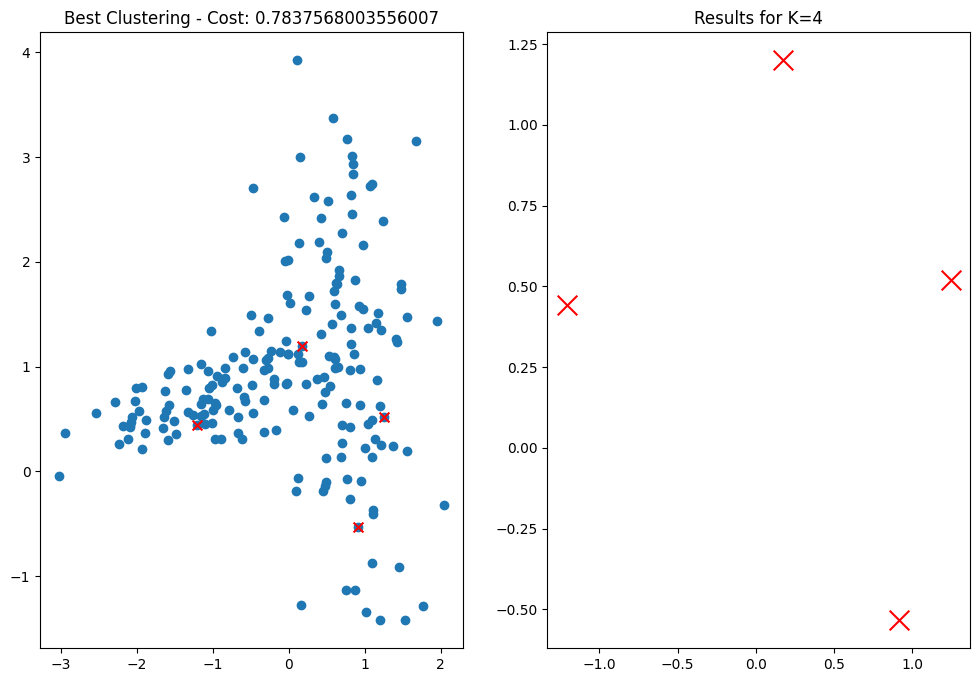

In [46]:
num_initializations = 100
min_cost = np.inf
best_centroids = None
best_labels = None

for _ in range(num_initializations):
    Xc_2, _ = make_classification(n_samples=200, 
                                  n_features=2, 
                                  n_informative=2, 
                                  n_redundant=0, 
                                  random_state=0, 
                                  n_clusters_per_class=1, 
                                  class_sep=0.8)

    K = 4
    centroids = Xc_2[np.random.choice(Xc_2.shape[0], K, replace=False)]

    cost = np.sum(np.linalg.norm(Xc_2 - centroids[labels], axis=1)**2) / Xc_2.shape[0]

    if cost < min_cost:
        min_cost = cost
        best_centroids = centroids
    
    labels = np.argmin(np.linalg.norm(Xc_2[:, np.newaxis, :] - best_centroids, axis=2), axis=1)
    
plt.figure(figsize=(12, 8))

# Visualize the best clustering for K=4
plt.subplot(1, 2, 1)
plt.scatter(Xc_2[:, 0], Xc_2[:, 1], c=best_labels, cmap='viridis', label='Data')
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], marker='x', color='red', s=50, label='Best Centroids')
plt.title(f'Best Clustering - Cost: {min_cost}')

# Visualize results (clusters, centroids) for K=4
plt.subplot(1, 2, 2)
for k in range(K):
    plt.scatter(Xc_2[best_labels == k, 0], Xc_2[best_labels == k, 1], label=f'Cluster {k + 1}')
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], marker='x', color='red', s=200, label='Centroids')
plt.title('Results for K=4')
plt.show()

<font color = green >

## Home Task 2: 

</font>

Apply various clustering algorithms 

- Agglomerative clustering using `complete` linkage 
- Agglomerative clustering using `single` linkage 
- DBSCAN
- Use albow method to determine the best k for Kmeans

In [47]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

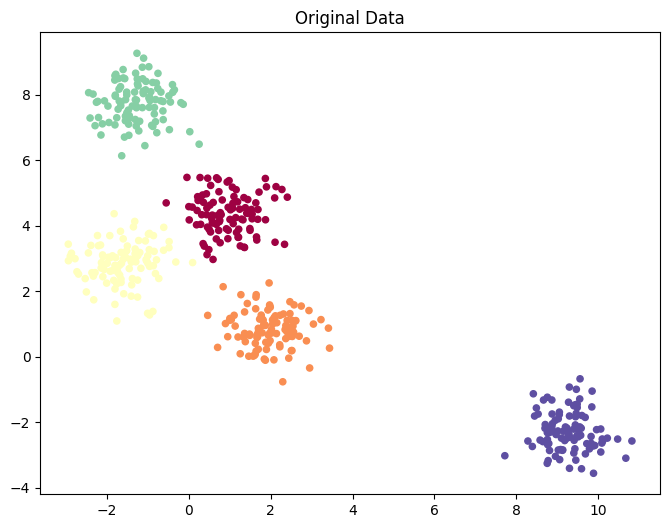

In [48]:
X, y = make_blobs(n_samples = 500, 
                  n_features = 2, 
                  centers = 5, 
                  cluster_std = 0.6, 
                  random_state = 0)

colors = np.array([plt.cm.Spectral(val) 
                   for val in np.linspace(0, 1, len(set(y)))])

plt.figure(figsize=(8,6))
plt.title('Original Data')
plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)    

Agglomerative clustering using `complete` linkage 

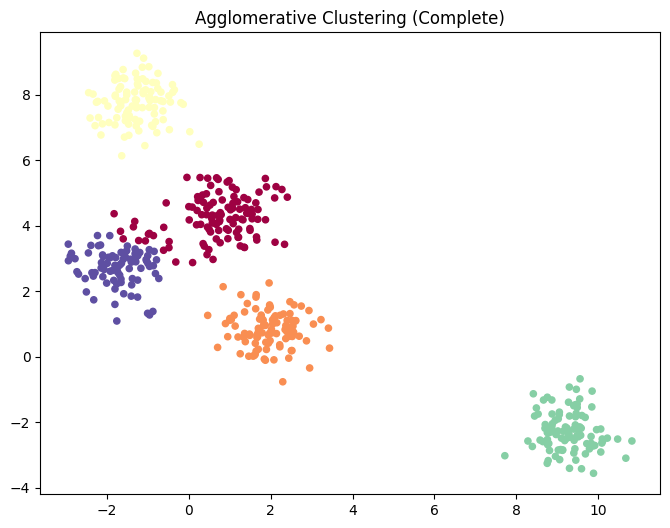

In [49]:
agg_complete = AgglomerativeClustering(n_clusters=5, linkage='complete')

y_agg_complete = agg_complete.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=colors[y_agg_complete], s=20)
plt.title('Agglomerative Clustering (Complete)')
plt.show()

Agglomerative clustering using `single` linkage 

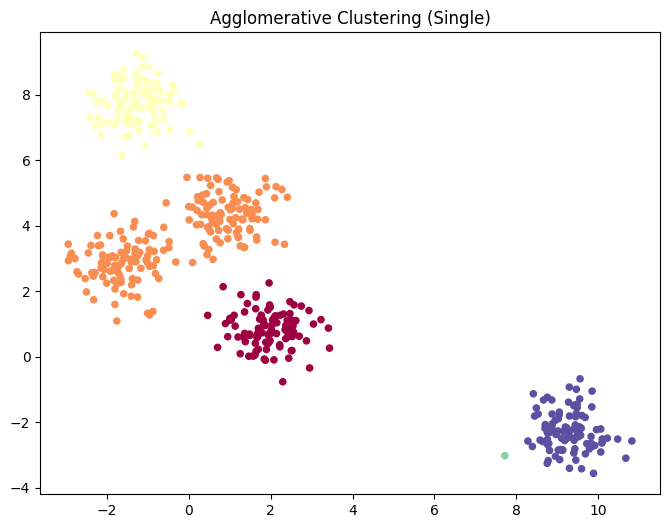

In [50]:
agg_single = AgglomerativeClustering(n_clusters=5, linkage='single')

y_agg_single = agg_single.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=colors[y_agg_single], s=20)
plt.title('Agglomerative Clustering (Single)')
plt.show()

DBSCAN

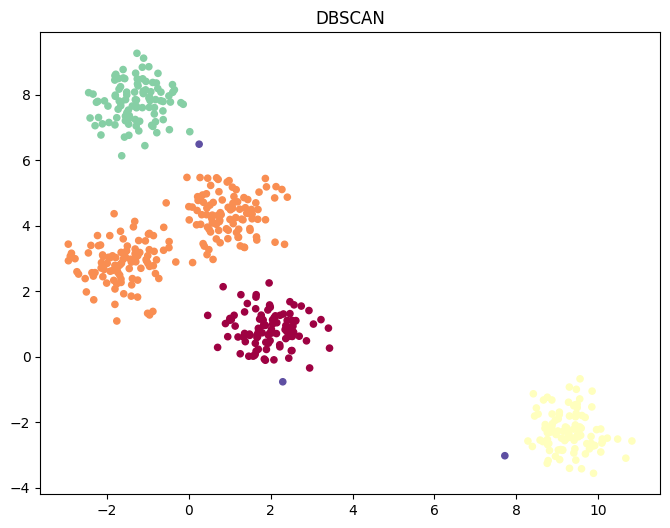

In [51]:
dbscan = DBSCAN(eps=0.7, min_samples=5)

y_dbscan = dbscan.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=colors[y_dbscan], s=20)
plt.title('DBSCAN')
plt.show()

Use albow method to determine the best k for Kmeans

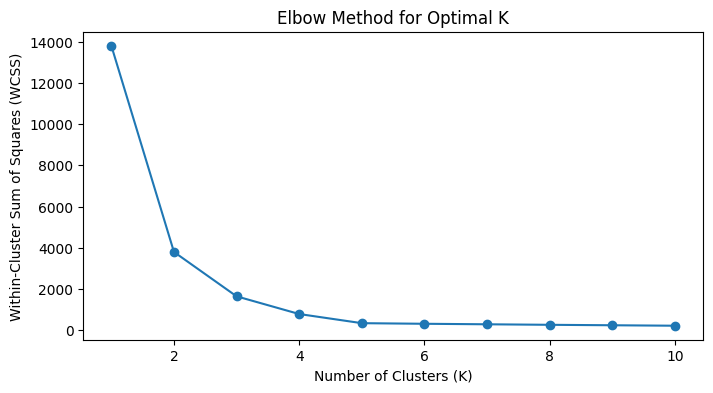

In [52]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()